## 15. 문자를 읽을 수 있는 딥러닝

### 15-9. 프로젝트 : 다양한 OCR모델 비교하기

In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

# keras_ocr
import keras_ocr

# 테서랙트
import pytesseract
from pytesseract import Output

In [2]:
path = './ocr_image'
img_path = glob(path+'/*')

In [3]:
print(img_path)
print(len(img_path))

['./ocr_image/8.png', './ocr_image/1.jpeg', './ocr_image/5.png', './ocr_image/3.png', './ocr_image/10.jpeg', './ocr_image/2.jpeg', './ocr_image/9.png', './ocr_image/4.png', './ocr_image/7.png', './ocr_image/6.png']
10


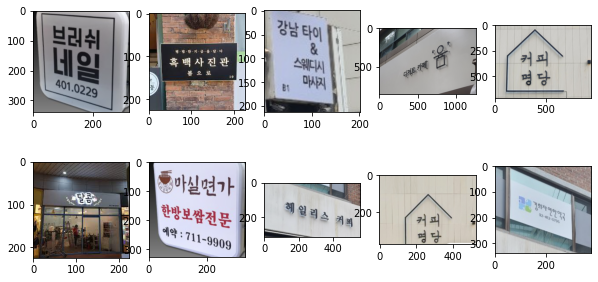

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    pil_img = Image.open(img_path[i])
    plt.imshow(pil_img)
plt.show()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


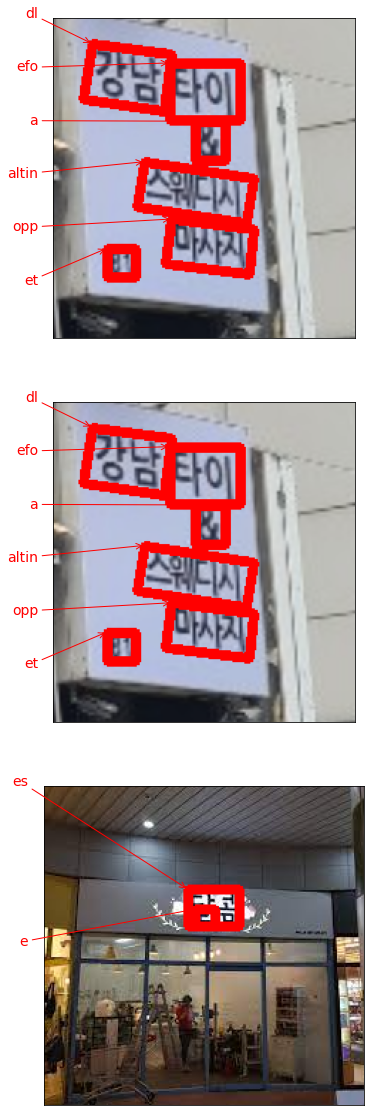

In [5]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

random_idx = np.random.choice(np.arange(len(img_path)), 3) # random choice

image_path = []
for i in random_idx :
    image_path.append(img_path[i])

images = [ keras_ocr.tools.read(path) for path in image_path]
prediction_groups = [pipeline.recognize([path]) for path in image_path]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

영어로 나온다

In [6]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [7]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr_image'
#테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

random_idx = np.random.choice(np.arange(len(img_path)), 3) #random choice 3 image
cropped_image_path_list = []
for i in random_idx :
    img_file_path = img_path[i]
    if not os.path.exists(os.path.join(work_dir, f'result_image_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_image_{i}'))
    
    temp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_image_{i}'))
    cropped_image_path_list.extend(temp)

/aiffel/aiffel/ocr_python/ocr_image/result_image_6/0000.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_6/0001.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_6/0002.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_6/0003.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_5/0000.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_7/0000.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_7/0001.png
/aiffel/aiffel/ocr_python/ocr_image/result_image_7/0002.png


In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [9]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 3, replace=False)
#random_idx 3개 뽑기
cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/aiffel/aiffel/ocr_python/ocr_image/result_image_7/0002.png',
 '/aiffel/aiffel/ocr_python/ocr_image/result_image_5/0000.png',
 '/aiffel/aiffel/ocr_python/ocr_image/result_image_6/0003.png']

In [10]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_pahts)

기피


1~9900

Done


기피

Done


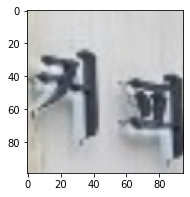


Done


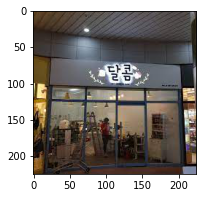

1~9900

Done


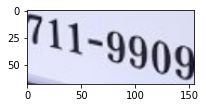

In [11]:
for i in range(3) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

- 생각보다 사진 자료가 별로여서 그런지 인식이 잘 된다라는 느낌이 안 들었다 ㅠㅠ
- 영어로 하면 훨씬 잘 나올거같다
- 이미지에서 글자를 추출해서 읽을 수 있다는게 신기했다 !!